In [22]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

In [23]:
from google.colab import drive
drive.mount('/content/drive')
!cp -r "/content/drive/MyDrive/24341262_Khaled Saifullah Karim_Lab2 Assignment[CSE463]/Task_1/Dataset_1" /content/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
image_list = os.listdir("/content/Dataset_1")
print(image_list)

['image_1.jpeg']


Task 1

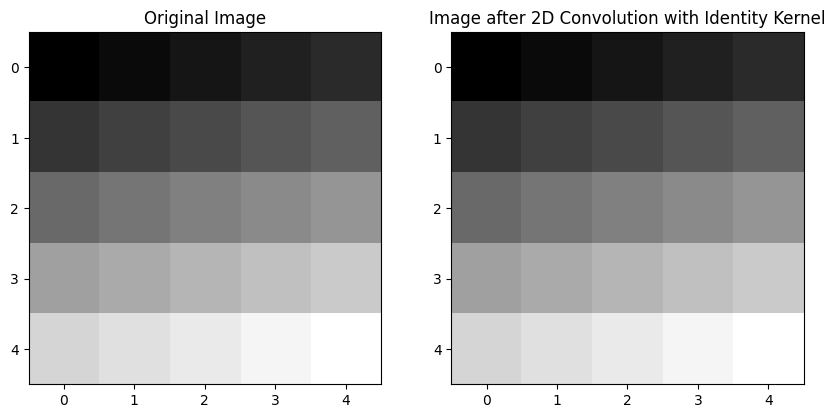

In [25]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = np.array([[10, 20, 30, 40, 50],
                [60, 70, 80, 90, 100],
                [110, 120, 130, 140, 150],
                [160, 170, 180, 190, 200],
                [210, 220, 230, 240, 250]], dtype=np.uint8)

def apply_convolution(img, kernel):
    return cv2.filter2D(img, -1, kernel)


identity_kernel = np.array([[0, 0, 0],
                            [0, 1, 0],
                            [0, 0, 0]])

convolved_img = apply_convolution(img, identity_kernel)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(img, cmap='gray')
plt.subplot(1, 2, 2)
plt.title("Image after 2D Convolution with Identity Kernel")
plt.imshow(convolved_img, cmap='gray')
plt.show()


Task 2


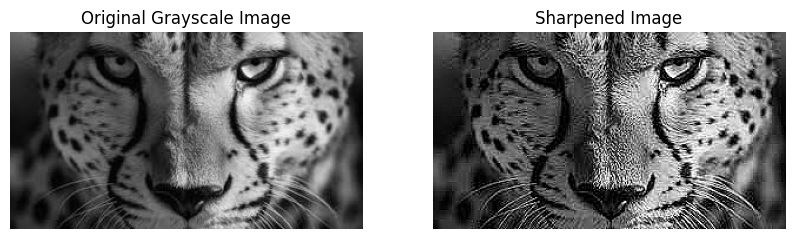

In [33]:
image_path = cv2.imread('./image_1.jpeg')
gray_img = cv2.cvtColor(image_path, cv2.COLOR_BGR2GRAY)

sharpening_kernel = np.array([[ 0, -1,  0],
                               [-1,  5, -1],
                               [ 0, -1,  0]])

sharpened_img = cv2.filter2D(gray_img, -1, sharpening_kernel)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Grayscale Image")
plt.imshow(gray_img, cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title("Sharpened Image")
plt.imshow(sharpened_img, cmap='gray')
plt.axis('off')
plt.show()


Task 3

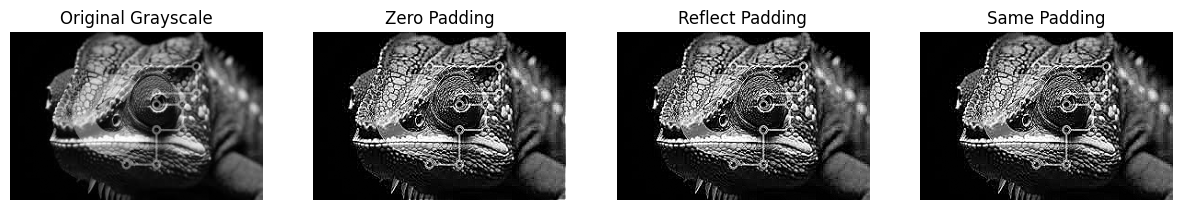

In [38]:
img = cv2.imread('./image_2.jpeg')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

sharpening_kernel = np.array([[ 0, -1,  0],
                               [-1,  5, -1],
                               [ 0, -1,  0]], dtype=np.float32)


zero_padded = cv2.copyMakeBorder(gray_img, 1, 1, 1, 1, cv2.BORDER_CONSTANT, value=0)
sharpened_zero = cv2.filter2D(zero_padded, -1, sharpening_kernel)[1:-1, 1:-1]  # Remove extra border

reflect_padded = cv2.copyMakeBorder(gray_img, 1, 1, 1, 1, cv2.BORDER_REFLECT)
sharpened_reflect = cv2.filter2D(reflect_padded, -1, sharpening_kernel)[1:-1, 1:-1]

same_padded = cv2.copyMakeBorder(gray_img, 1, 1, 1, 1, cv2.BORDER_REPLICATE)
sharpened_same = cv2.filter2D(same_padded, -1, sharpening_kernel)[1:-1, 1:-1]


plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1)
plt.title("Original Grayscale")
plt.imshow(gray_img, cmap='gray')
plt.axis('off')
plt.subplot(1, 4, 2)
plt.title("Zero Padding")
plt.imshow(sharpened_zero, cmap='gray')
plt.axis('off')
plt.subplot(1, 4, 3)
plt.title("Reflect Padding")
plt.imshow(sharpened_reflect, cmap='gray')
plt.axis('off')
plt.subplot(1, 4, 4)
plt.title("Same Padding")
plt.imshow(sharpened_same, cmap='gray')
plt.axis('off')
plt.show()


Task 4: Explanation:
Gaussian noise was added to the image to simulate real-world distortions.
Applying a 5×5 average filter using cv2.blur() smoothed the noise by averaging pixel values,
reducing random variations while slightly blurring the image.

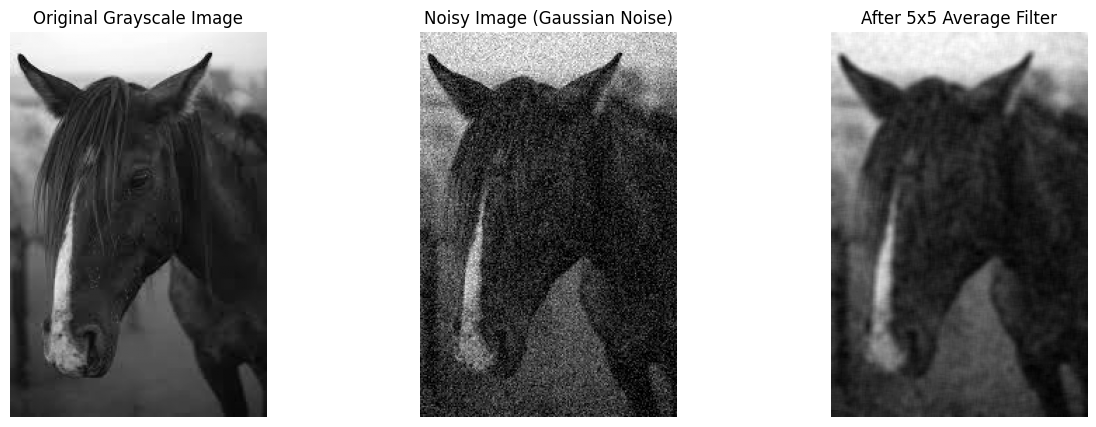

In [43]:
image_path = './image_4.jpeg'
img = cv2.imread(image_path)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def add_gaussian_noise(image, mean=0, sigma=25):
    noisy_image = image + np.random.normal(mean, sigma, image.shape).astype(np.uint8)
    return noisy_image

noisy_img = add_gaussian_noise(gray_img)
blurred_img = cv2.blur(noisy_img, (5, 5))

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title("Original Grayscale Image")
plt.imshow(gray_img, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.title("Noisy Image (Gaussian Noise)")
plt.imshow(noisy_img, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.title("After 5x5 Average Filter")
plt.imshow(blurred_img, cmap='gray')
plt.axis('off')
plt.show()



Task 5: Explanation:
Applying a 5×5 Gaussian blur with different sigma values smooths the noisy image
by reducing high-frequency variations. As the sigma value increases, the image
becomes progressively more blurred,effectively suppressing noise but also
losing finer details.

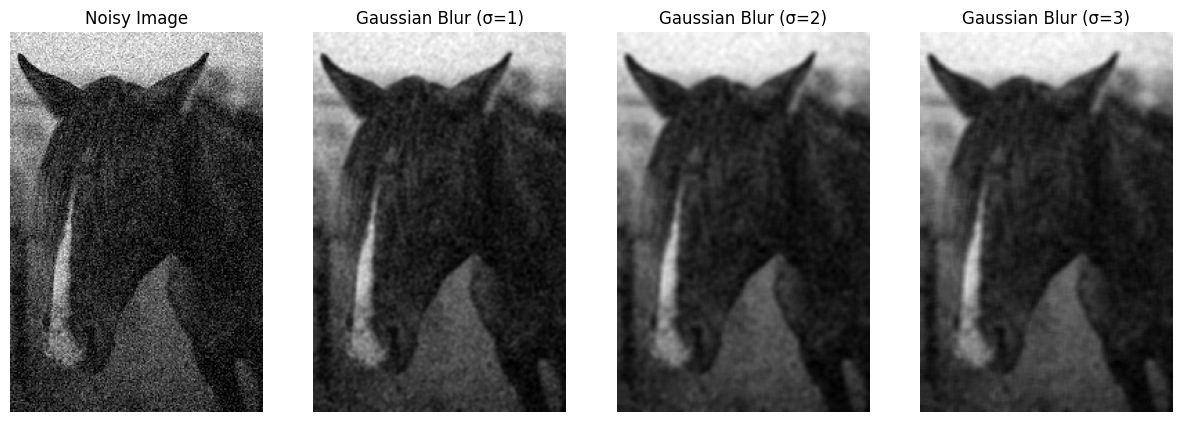

In [44]:
#Gaussian blur (different sigma values)
gaussian_blur_sigma1 = cv2.GaussianBlur(noisy_img, (5, 5), sigmaX=1)
gaussian_blur_sigma2 = cv2.GaussianBlur(noisy_img, (5, 5), sigmaX=2)
gaussian_blur_sigma3 = cv2.GaussianBlur(noisy_img, (5, 5), sigmaX=3)


plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1)
plt.title("Noisy Image")
plt.imshow(noisy_img, cmap='gray')
plt.axis('off')
plt.subplot(1, 4, 2)
plt.title("Gaussian Blur (σ=1)")
plt.imshow(gaussian_blur_sigma1, cmap='gray')
plt.axis('off')
plt.subplot(1, 4, 3)
plt.title("Gaussian Blur (σ=2)")
plt.imshow(gaussian_blur_sigma2, cmap='gray')
plt.axis('off')
plt.subplot(1, 4, 4)
plt.title("Gaussian Blur (σ=3)")
plt.imshow(gaussian_blur_sigma3, cmap='gray')
plt.axis('off')
plt.show()



Task 6

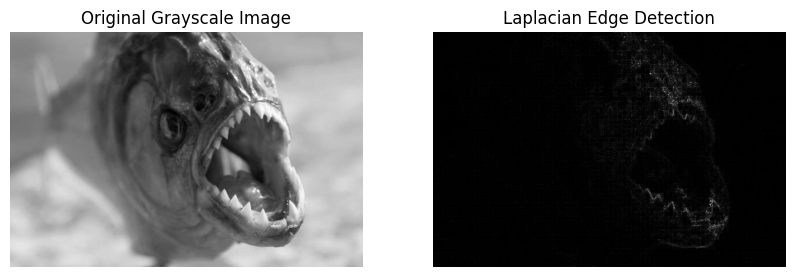

In [47]:
image_path = "image_5.jpg"
img = cv2.imread(image_path)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

laplacian = cv2.Laplacian(gray_img, cv2.CV_64F)
laplacian = cv2.convertScaleAbs(laplacian)


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Grayscale Image")
plt.imshow(gray_img, cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title("Laplacian Edge Detection")
plt.imshow(laplacian, cmap='gray')
plt.axis('off')
plt.show()

Task 7: Explanation:
one for vertical edges (detecting changes in the vertical direction) and one for
horizontal edges (detecting changes in the horizontal direction).
The resulting images highlight vertical and horizontal edges, respectively.

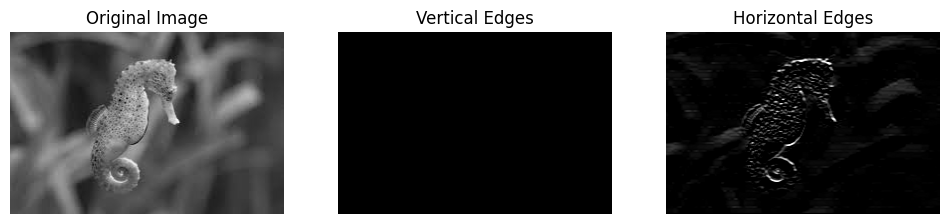

In [51]:
image_path = "image_6.jpeg"
img = cv2.imread(image_path)
image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

K_vertical = np.array([[-1, 0, -1],
                       [-1, 0, -1],
                       [-1, 0, -1]])

K_horizontal = np.array([[-1, -1, -1],
                         [ 0,  0,  0],
                         [ 1,  1,  1]])

vertical_edges = cv2.filter2D(image, -1, K_vertical)
horizontal_edges = cv2.filter2D(image, -1, K_horizontal)

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(vertical_edges, cmap='gray')
plt.title("Vertical Edges")
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(horizontal_edges, cmap='gray')
plt.title("Horizontal Edges")
plt.axis('off')
plt.show()



Task 7 a)Explanation:
After applying histogram equalization, the contrast of the image improves by spreading
the pixel intensities more evenly across the entire range, making the dark areas
darker and the bright areas brighter.

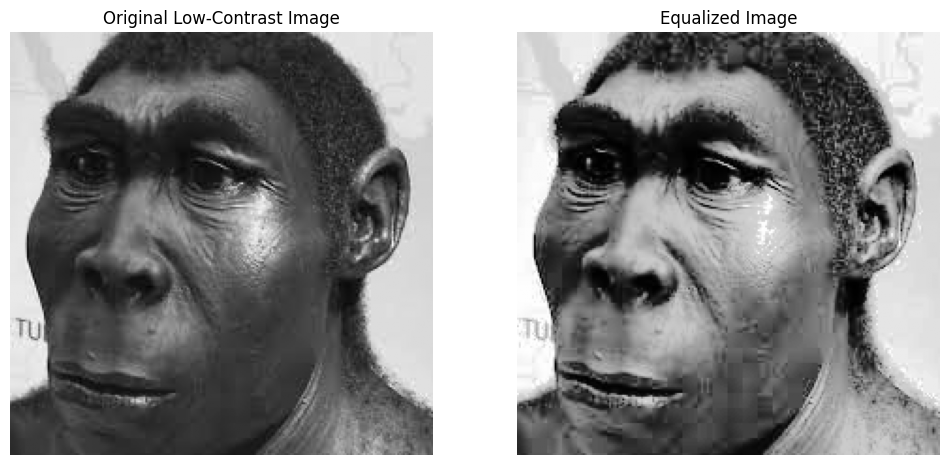

In [53]:
image_path = "image_7.jpeg"
img = cv2.imread(image_path)
image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

equalized_image = cv2.equalizeHist(image)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Low-Contrast Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title("Equalized Image")
plt.axis('off')
plt.show()



7.b) Explanation:
After multiple applications of histogram equalization, the contrast improvements
diminish as the pixel values become more evenly distributed,
leading to less noticeable enhancement with each iteration.

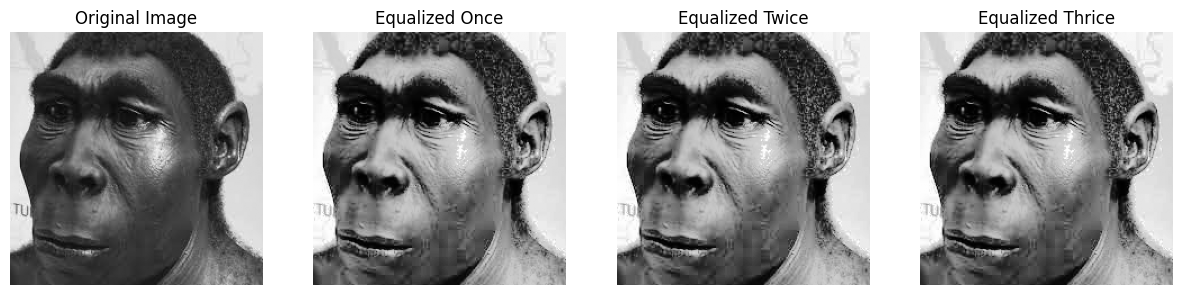

In [55]:
equalized_1 = cv2.equalizeHist(image)
equalized_2 = cv2.equalizeHist(equalized_1)
equalized_3 = cv2.equalizeHist(equalized_2)


plt.figure(figsize=(15, 8))
plt.subplot(1, 4, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.subplot(1, 4, 2)
plt.imshow(equalized_1, cmap='gray')
plt.title("Equalized Once")
plt.axis('off')
plt.subplot(1, 4, 3)
plt.imshow(equalized_2, cmap='gray')
plt.title("Equalized Twice")
plt.axis('off')
plt.subplot(1, 4, 4)
plt.imshow(equalized_3, cmap='gray')
plt.title("Equalized Thrice")
plt.axis('off')
plt.show()

